# **Data Preprocessing**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style = "whitegrid")

## Feature Extraction

DictVectorizer -  list of dict objects to feature matrix

In [ ]:
data = [{'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse = False)
data_transformed = dv.fit_transform(data)   #fit learns, transform actually transforms
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [ ]:
data_transformed.shape

(4, 2)

Data Imputation - replaces missing using mean/median/mode....

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
#heart disease data set
cols =[ 'age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']
heart_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None, names = cols)

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [ ]:
print("Unique ca: ", heart_data.ca.unique())
print("Unique thal: ", heart_data.thal.unique())

Unique ca:  ['0.0' '3.0' '2.0' '1.0' '?']
Unique thal:  ['6.0' '3.0' '7.0' '?']


In [ ]:
print("#missing in ca:", heart_data.loc[heart_data.ca=='?','ca'].count())
print("#missing in thal:", heart_data.loc[heart_data.thal=='?','thal'].count())

#missing in ca: 4
#missing in thal: 2


In [ ]:
#replace ? with nan
heart_data.replace('?', np.nan, inplace = True)

In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


In [ ]:
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean', add_indicator = True)   # additional cols added (add_indicator) if true indicates initial val was missing
imputer = imputer.fit(heart_data)
heart_data_imputed = imputer.transform(heart_data)
print(heart_data_imputed.shape)

(303, 16)


Feature Scaling

In [ ]:
#Ablone dataset
cols = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']
ablone_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data',header = None, names = cols)

In [ ]:
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
ablone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [ ]:
ablone_data.Sex.unique()

array(['M', 'F', 'I'], dtype=object)

In [ ]:
ablone_data = ablone_data.replace({"Sex":{"M": 1, "F": 2, "I": 3}})
ablone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


In [ ]:
y = ablone_data.pop("Rings")   #pop the label
print("The DF object after deleting the col")
ablone_data.info()

The DF object after deleting the col
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [ ]:
ablone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


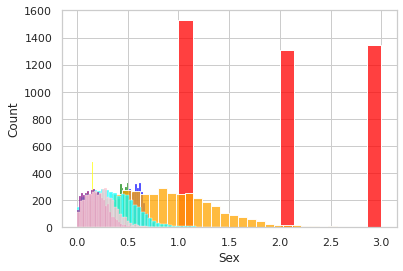

In [ ]:
# ablone_data_view = sns.load_dataset(ablone_data)
sns.histplot(data=ablone_data, x="Sex",color = 'red')
sns.histplot(data=ablone_data, x="Length",color = 'blue')
sns.histplot(data=ablone_data, x="Diameter", color = 'green')
sns.histplot(data=ablone_data, x="Height", color = 'yellow')
sns.histplot(data=ablone_data, x="Whole weight", color = 'orange')
sns.histplot(data=ablone_data, x="Shucked weight", color = 'cyan')
sns.histplot(data=ablone_data, x="Viscera weight", color = 'purple')
sns.histplot(data=ablone_data, x="Shell weight", color = 'pink')

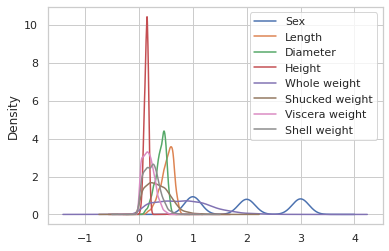

In [ ]:
ax = ablone_data.plot.kde()    #kernel density

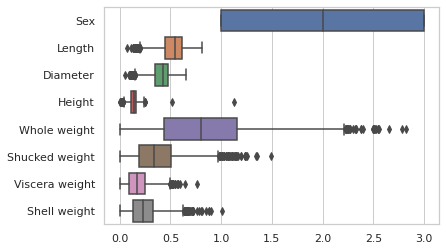

In [ ]:
sns.boxplot(data = ablone_data, orient = "h")       #orient to change orientation - horizontal/vertical

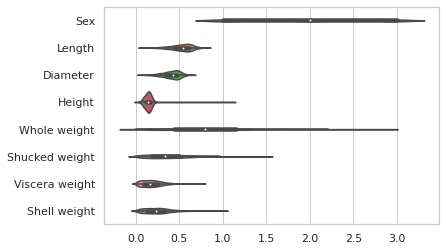

In [ ]:
sns.violinplot(data = ablone_data, orient = "h")   #KDE + boxplot

In [ ]:
# MaxAbsScaler

x = np.array([4,2,5,-2,-100]).reshape(-1,1)     #reshape to take transpose
x

array([[   4],
       [   2],
       [   5],
       [  -2],
       [-100]])

In [55]:
#MinMaxScalar - range 0-1
from sklearn.preprocessing import MaxAbsScaler
x = ablone_data
mas = MaxAbsScaler()
x_new = mas.fit_transform(x)
print(x_new[:5])

[[0.33333333 0.55828221 0.56153846 0.0840708  0.18191471 0.15087366
  0.13289474 0.14925373]
 [0.33333333 0.42944785 0.40769231 0.07964602 0.07980888 0.06686828
  0.06381579 0.06965174]
 [0.66666667 0.65030675 0.64615385 0.11946903 0.23960361 0.17237903
  0.18618421 0.20895522]
 [0.33333333 0.5398773  0.56153846 0.11061947 0.18262254 0.14482527
  0.15       0.15422886]
 [1.         0.40490798 0.39230769 0.07079646 0.07255353 0.06014785
  0.05197368 0.05472637]]


In [56]:
from sklearn.preprocessing import MinMaxScaler
x = ablone_data
mms = MinMaxScaler()
x_new = mms.fit_transform(x)
print(x_new[:5])

[[0.         0.51351351 0.5210084  0.0840708  0.18133522 0.15030262
  0.1323239  0.14798206]
 [0.         0.37162162 0.35294118 0.07964602 0.07915707 0.06624075
  0.06319947 0.06826109]
 [0.5        0.61486486 0.61344538 0.11946903 0.23906499 0.17182246
  0.18564845 0.2077728 ]
 [0.         0.49324324 0.5210084  0.11061947 0.18204356 0.14425017
  0.14944042 0.15296462]
 [1.         0.34459459 0.33613445 0.07079646 0.07189658 0.0595158
  0.05134957 0.0533134 ]]


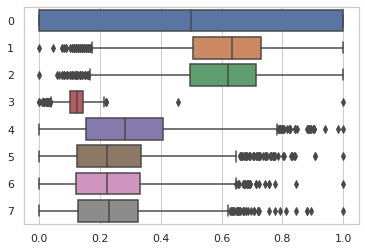

In [58]:
sns.boxplot(data = x_new, orient = "h")   # range now between 0 and 1

In [59]:
#StandardScalar
from sklearn.preprocessing import StandardScaler
x = ablone_data
mms = StandardScaler()
x_new = mms.fit_transform(x)
print(x_new[:5])

[[-1.15434629 -0.57455813 -0.43214879 -1.06442415 -0.64189823 -0.60768536
  -0.72621157 -0.63821689]
 [-1.15434629 -1.44898585 -1.439929   -1.18397831 -1.23027711 -1.17090984
  -1.20522124 -1.21298732]
 [ 0.05379815  0.05003309  0.12213032 -0.10799087 -0.30946926 -0.4634999
  -0.35668983 -0.20713907]
 [-1.15434629 -0.69947638 -0.43214879 -0.34709919 -0.63781934 -0.64823753
  -0.60759966 -0.60229374]
 [ 1.26194258 -1.61554351 -1.54070702 -1.42308663 -1.27208566 -1.2159678
  -1.28733718 -1.32075677]]


In [69]:
x_new.mean(axis = 0)      # almost 0 ???

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        8.84563616e-17,  3.40216776e-18,  6.80433551e-18,  2.89184259e-16])

In [62]:
x_new.std(axis = 0)  #std now 1

array([1., 1., 1., 1., 1., 1., 1., 1.])

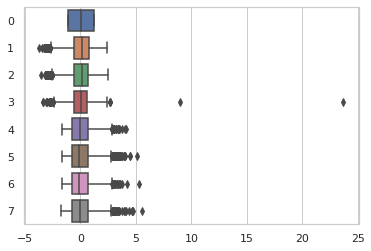

In [70]:
sns.boxplot(data = x_new, orient = "h")     #mean = 0 and std = 1